In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('housePrices_train.csv')

In [2]:
data.shape

(1460, 81)

In [7]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\KAMOA\AppData\Local\Temp\ipykernel_6256\1218454685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


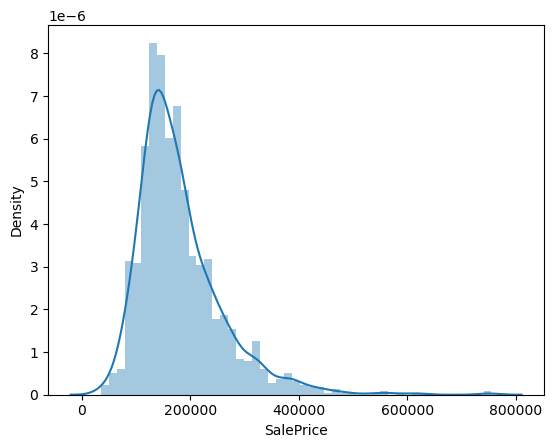

In [11]:
sns.distplot(data['SalePrice'])
plt.show()

In [12]:
print(data['SalePrice'].min())
print(data['SalePrice'].max())
print(data['SalePrice'].mean())
print(data['SalePrice'].median())
print(data['SalePrice'].mode())
print(data['SalePrice'].std())
print(data['SalePrice'].var())
print(data['SalePrice'].kurt())
print(data['SalePrice'].skew())

34900
755000
180921.19589041095
163000.0
0    140000
Name: SalePrice, dtype: int64
79442.50288288663
6311111264.297451
6.536281860064529
1.8828757597682129


In [13]:
np.random.seed(23)
sampleprice = np.random.choice(a=data['SalePrice'],size=500)
sampleprice.mean()

181655.048

In [14]:
data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [15]:
from statsmodels.stats.weightstats import ztest
zval , pval = ztest(x1 = data[data['Neighborhood']=='Edwards']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-12.196987594087203    :  3.2253680352007412e-34


In [16]:
zval , pval = ztest(x1 = data[data['Neighborhood']=='OldTown']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-10.639294263334575    :  1.9560526026260018e-26


In [17]:
mean_ =data[data['Neighborhood']=='Edwards']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='Edwards']['SalePrice'].std()
from scipy import stats
z_sc=(180000-mean_)/stdev
stats.norm.cdf(z_sc)

0.8846152543518949

In [18]:
stats.t.interval(.90,len(data[data['Neighborhood']=='Edwards']['SalePrice']),mean_, scale=stdev)

(56483.2717735012, 199956.12822649878)

In [19]:
mean_ =data[data['Neighborhood']=='SawyerW']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='SawyerW']['SalePrice'].std()
from scipy import stats
z_sc=(280000-mean_)/stdev
stats.norm.cdf(z_sc)

0.9534318553545458

In [20]:
stats.t.interval(.90,len(data[data['Neighborhood']=='SawyerW']['SalePrice']),mean_, scale=stdev)

(93556.13084670802, 279555.4623736309)

In [21]:
data[data['Neighborhood']=='SawyerW']['SalePrice'].max()

320000

In [22]:
a=data[data['Neighborhood']=='SawyerW']['SalePrice']
b=data[data['Neighborhood']=='Edwards']['SalePrice']
stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=7.375410592264813, pvalue=8.880142338427138e-12)

In [29]:
tscore, pvalue = stats.ttest_1samp(data[data['Neighborhood']=='CollgCr']['SalePrice'].sample(50), popmean=data['SalePrice'].mean())
print(tscore, ' : ',pvalue)

2.844790757725714  :  0.006468248027650152


<Axes: >

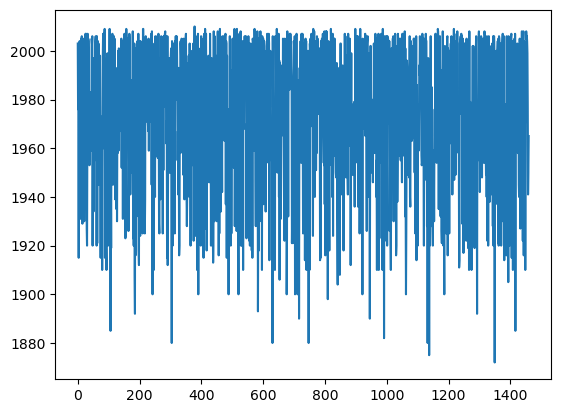

In [30]:
data['YearBuilt'].plot()

In [31]:
a= data[data['YearBuilt']<=1990]['SalePrice']
b=data[data['YearBuilt']>1990]['SalePrice']
stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-25.56467512748203, pvalue=2.0817612468835544e-119)

In [32]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = stats.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285



 -------------------- describe ---------------------

LandContour            Bnk            HLS            Low            Lvl
count            63.000000      50.000000      36.000000    1311.000000
mean         143104.079365  231533.940000  203661.111111  180183.746758
std           49361.244074  101790.139741   83935.353620   78463.567918
min           52500.000000   82500.000000   39300.000000   34900.000000
25%          113000.000000  151750.000000  143000.000000  130000.000000
50%          139400.000000  222250.000000  190000.000000  162900.000000
75%          171250.000000  281347.250000  263750.000000  212000.000000
max          315000.000000  538000.000000  385000.000000  755000.000000


 -------------------- One way anova ---------------------



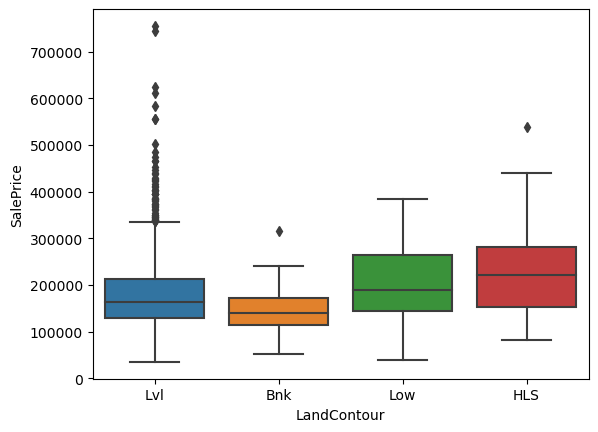

In [33]:
print('\n -------------------- describe ---------------------\n')
print(data.groupby('LandContour')['SalePrice'].describe().T)
    
    
#box_plot(category_cols,independent_col,dependent_col)
sns.boxplot(x='LandContour', y='SalePrice', data = data)
print('\n\n -------------------- One way anova ---------------------\n')

In [34]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'],data['SalePrice'][data['LandContour'] == 'Bnk'],data['SalePrice'][data['LandContour'] == 'Low'],data['SalePrice'][data['LandContour'] == 'HLS'])


F_onewayResult(statistic=12.850188333283924, pvalue=2.7422167521379096e-08)

In [35]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'].sample(35),data['SalePrice'][data['LandContour'] == 'Bnk'].sample(35),data['SalePrice'][data['LandContour'] == 'Low'].sample(35),data['SalePrice'][data['LandContour'] == 'HLS'].sample(35))


F_onewayResult(statistic=8.901634410502034, pvalue=1.992130838314323e-05)